# SVM in Python with sklearn

## Data exploration

In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
file_name = "Titanic_Dataset.csv"
df = pd.read_csv(file_name)

# Preprocess the data
# Encoding categorical data
sex_encoder = LabelEncoder()
name_encoder = LabelEncoder()
ticket_encoder = LabelEncoder()
cabin_encoder = LabelEncoder()

df['Sex'] = sex_encoder.fit_transform(df['Sex'])  # Convert 'Sex' to numerical
df['Name'] = name_encoder.fit_transform(df['Name'])  # Convert 'Name' to numerical
df['Ticket'] = ticket_encoder.fit_transform(df['Ticket'])  # Convert 'Ticket' to numerical
df['Cabin'] = cabin_encoder.fit_transform(df['Cabin'])  # Convert 'Cabin' to numerical

df['Embarked'].fillna('S', inplace=True)  # Fill missing 'Embarked' with 'S' for Southampton
#df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # Convert 'Embarked' to numerical
df = pd.get_dummies(df, columns=['Embarked'])
# Convert True/False values to 0/1
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Replace missing 'Age' with median value

# Drop unnecessary columns
df.drop(['PassengerId'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['Embarked_C'], axis=1, inplace=True)
df.drop(['Pclass'], axis=1, inplace=True)

df.head()

C:\Users\pink\AppData\Local\Temp\ipykernel_33772\2235628883.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)  # Fill missing 'Embarked' with 'S' for Southampton
C:\Users\pink\AppData\Local\Temp\ipykernel_33772\2235628883.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,147,0,1
1,1,0,38.0,1,0,71.2833,81,0,0
2,1,0,26.0,0,0,7.9250,147,0,1
3,1,0,35.0,1,0,53.1000,55,0,1
4,0,1,35.0,0,0,8.0500,147,0,1


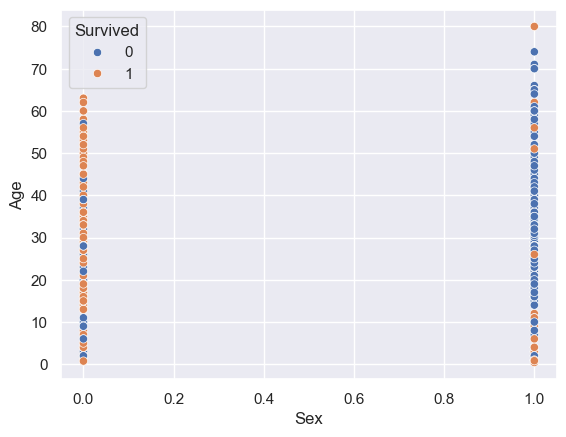

In [56]:
# Plotting our data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Sex", y="Age", hue="Survived", data=df)

## Get data ready for training in sklearn 

In [90]:
# Extract the columns we'll use for our data

x = df.iloc[:,1:].values 
y = df.iloc[:,0].values

# Feature engineering 


# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [89]:
# Import our model and performance assessement classes from sklearn

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Support Vector Machine Performance

In [93]:
# Fit (train) the Support Vector Machine classifier
svm_clf = SVC()
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))

print(confusion_matrix(svm_prediction, Y_test))


Accuracy 77.78%
[[48 17]
 [ 3 22]]
